### KNN CLASSIFICATION IMPLEMENTATION

In [65]:
## IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import requests, io

In [66]:
data = pd.read_csv('https://raw.githubusercontent.com/SasinduChanakaPiyumal/Loan-Prediction-Model/refs/heads/main/loan_data_set.csv')

In [67]:
df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data processing and Data Handling for Inconsistant data 

In [71]:
## IMPUTATION OF MISSING VALUES

#FILLING GENDER COLUMN BY MODE
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().values[0])

In [72]:
# FILLING MARRIED COLUMN WITH MODE
df['Married'] = df['Married'].fillna(df['Married'].mode().values[0])


In [73]:
# FILLING DEPENDENTS BY MODE
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().values[0])

In [74]:
# FILLING SELF EMPLOYED COLUMN BY MODE
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().values[0])

In [75]:
## FILLING LOANAMOUNT COLUMN BY MEAN
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [76]:
#Filling Loan_Amount_Term column by mode
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().values[0] )

In [77]:
#Filling Credit_History column by mode
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode().values[0] )

In [78]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
## DROPING UNNECESSARY COLUMNS 
df.drop('Loan_ID', axis= 1, inplace= True)

In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## EXPLORATORY DATA ANALYSIS 

In [81]:
df.shape

(614, 12)

Gender
Male      502
Female    112
Name: count, dtype: int64

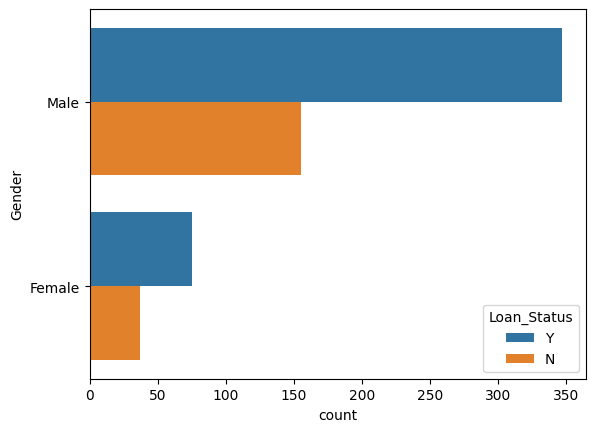

In [82]:
## Gender obtaining the maximum number of loans 
sns.countplot(y = 'Gender', hue= 'Loan_Status', data=df)
df['Gender'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

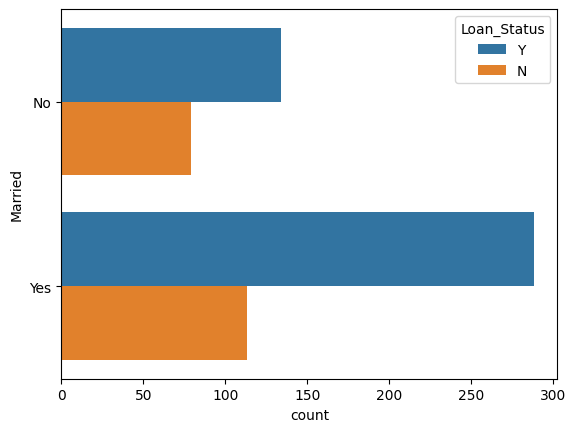

In [83]:
## DOES MARTIAL STATUS EFFECT LOAN APPROVAL
sns.countplot(y = 'Married', hue='Loan_Status', data=df)
df['Married'].value_counts()


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

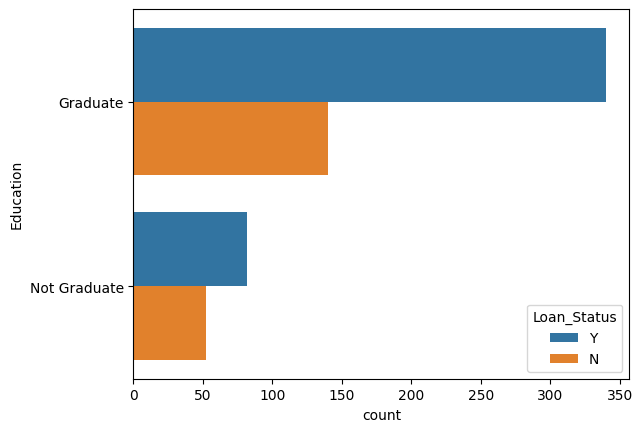

In [84]:
#Does education status affect loan approval?

sns.countplot(y = 'Education', hue = 'Loan_Status', data = df)
df['Education'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

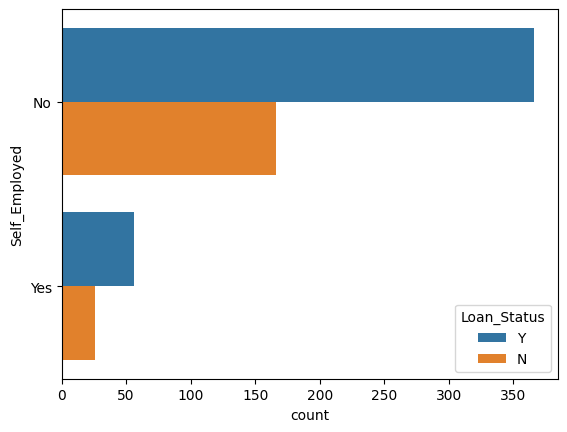

In [85]:
#Does employment affect loan approval?

sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data= df)
df['Self_Employed'].value_counts()

<Axes: xlabel='count', ylabel='Credit_History'>

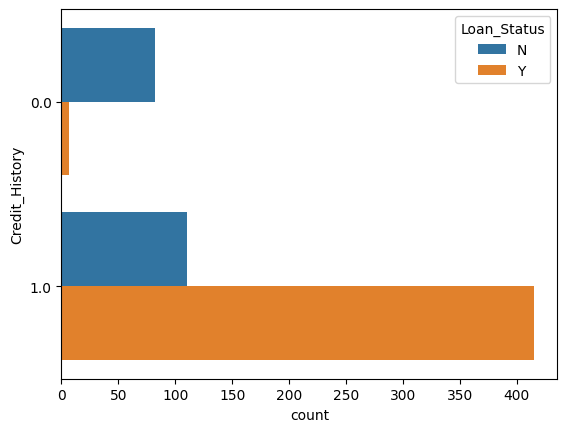

In [86]:
#Does credit history affect loan approval?

sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data=df)

## MODEL BUILDING 

In [87]:
# conerting objects into int 

gender = {"Female": 0 , "Male": 1}
yes_no = {'No': 0, 'Yes': 1}
dependents = {'0': 0 , '1': 1, '2': 2, '3+': 3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}


df['Gender'] = df['Gender'].replace(gender)
df['Married'] = df['Married'].replace(yes_no)
df['Dependents'] = df['Dependents'].replace(dependents)
df['Education'] = df['Education'].replace(education)
df['Self_Employed'] = df['Self_Employed'].replace(yes_no)
df['Property_Area'] = df['Property_Area'].replace(property)
df['Loan_Status'] = df['Loan_Status'].replace(output)

In [88]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [89]:
## SETTING THE INDEPENDENT AND DEPENDENT VARIABLES
x = df.drop('Loan_Status', axis= 1)
y = df['Loan_Status']


In [90]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [91]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [92]:
## splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.25, random_state=28, stratify= y)


In [93]:
## FITTINF THE KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [94]:
## prediction of the test
y_pred = knn.predict(x_test)
print(" Prediction For Test set: {}".format(y_pred))

 Prediction For Test set: [1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0]


In [95]:
## ACTUAL VALE AND PREDICTED VALUES
 
a = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
a.tail()

,Actual Value,Predicted Value
23,0,1
509,1,0
338,0,0
562,1,0
44,1,0


## EVALUATING THE MODEL

              precision    recall  f1-score   support

           0       0.35      0.21      0.26       144
           1       0.70      0.82      0.75       317

    accuracy                           0.63       461
   macro avg       0.52      0.52      0.51       461
weighted avg       0.59      0.63      0.60       461



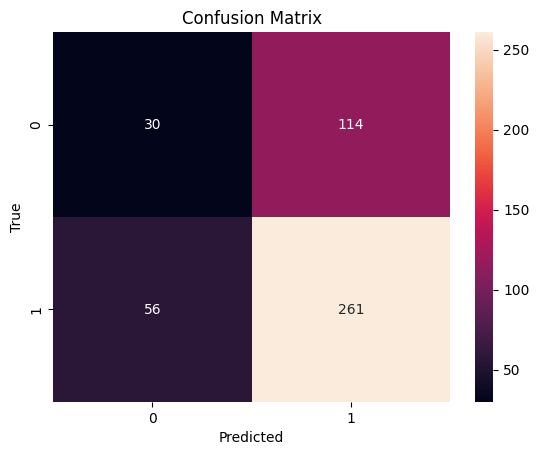

In [96]:
### Confusion matrix and classification report 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot= True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))